In [1]:
import copy
import os

import numpy as np
import pandas as pd

from grace_fo_stda.preprocessing.anomaly import anomaly
from grace_read.read import read

root_dir = os.getcwd()+"../../Data/"
files_path = ["/home/shivam/2020-21-1/CE678A/Project-Group3Musketeers/grace-temporal-data/NASA-JPL-GRACE/DDK1/"+file_n for file_n in os.listdir("/home/shivam/2020-21-1/CE678A/Project-Group3Musketeers/grace-temporal-data/NASA-JPL-GRACE/DDK1")]
len(files_path)

165

In [2]:
data = read(files_path)
print(len(data["sc_coeffs_mat"]))

165


In [3]:
import matplotlib.pyplot as plt

In [4]:
sc_anomaly_ = anomaly(data)
len(sc_anomaly_["sc_anomaly"])

165

In [5]:
sc_anomaly = sc_anomaly_["sc_anomaly"][0]
sc = np.concatenate((np.fliplr(sc_anomaly[:, 1:, 1]), sc_anomaly[:, :, 0]), axis=1)

In [6]:
sc.shape

(61, 121)

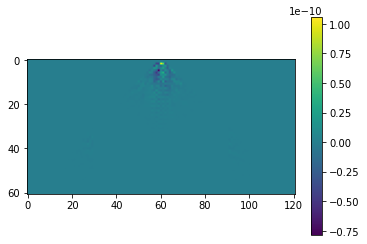

In [7]:
plt.imshow(sc)
plt.colorbar()

In [8]:
from grace_fo_stda.preprocessing.filters import gauss_filter

In [1]:
sc_new = gauss_filter(sc_anomaly_, gaussian_blur=np.float32([0.5, 0.1]))

NameError: name 'gauss_filter' is not defined

In [2]:
sc_anomaly1 = sc_new["sc_anomaly_abs_log"][0]
sc1 = np.concatenate((np.fliplr(sc_anomaly1[:, 1:, 1]), sc_anomaly1[:, :, 0]), axis=1)

NameError: name 'sc_new' is not defined

In [3]:
plt.imshow(sc1)
plt.colorbar()

NameError: name 'plt' is not defined

In [16]:
import scipy.io as sio
mat_contents = sio.loadmat("../../grace_fo_stda/physics/params/ctchmntindx3.mat")
mat_contents["cindx3"][np.where(mat_contents["cindx3"]<0)] = -1

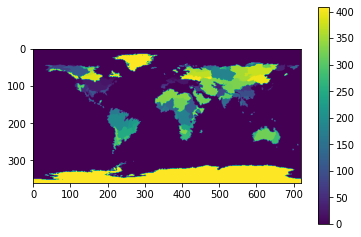

In [17]:
plt.imshow(mat_contents["cindx3"])
plt.colorbar()

In [30]:
np.shape(mat_contents["indx3"])
# plt.show()

(405, 1)

In [19]:
mat_contents_catchments = sio.loadmat("../../grace_fo_stda/physics/params/ctchnms.mat")
mat_contents_catchments

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug 24 10:51:14 2010',
 '__version__': '1.0',
 '__globals__': [],
 'ctchnms': array([[array(['ALABAMA'], dtype='<U7'), array([[54249.3]]),
         array([[203]], dtype=uint8), array([[101]], dtype=uint8)],
        [array(['ALAZEYA'], dtype='<U7'), array([[28735.12]]),
         array([[17]], dtype=uint8), array([[13]], dtype=uint8)],
        [array(['ALBANY RIVER'], dtype='<U12'), array([[97926.41]]),
         array([[115]], dtype=uint8), array([[16]], dtype=uint8)],
        ...,
        [array(['ZAGROS (IRAN) (DL)'], dtype='<U18'), array([[143834.4]]),
         array([[193]], dtype=uint8), array([[323]], dtype=uint16)],
        [array(['ZAMBEZI'], dtype='<U7'), array([[1115565]], dtype=int32),
         array([[340]], dtype=uint16), array([[238]], dtype=uint8)],
        [array(['ALL'], dtype='<U3'), array([[1.10813262e+08]]),
         array([[999]], dtype=uint16), array([[999]], dtype=uint16)]],
       dtype=objec

In [32]:
# np.asarray([:, 0], dtype=str)
# plt.plot(np.sort(np.concatenate(mat_contents_catchments["ctchnms"]).ravel()))
# np.where(np.concatenate(mat_contents_catchments["ctchnms"][:, 0]).ravel() == "GREENLAND")
# np.concatenate(mat_contents_catchments["ctchnms"][:, 3]).ravel()[np.where(np.concatenate(mat_contents_catchments["ctchnms"][:, 0]).ravel() == "GREENLAND")]
# mat_contents_catchments["ctchnms"][116, :]

array([array(['GREENLAND'], dtype='<U9'), array([[2147558]], dtype=int32),
       array([[2]], dtype=uint8), array([[409]], dtype=uint16)],
      dtype=object)

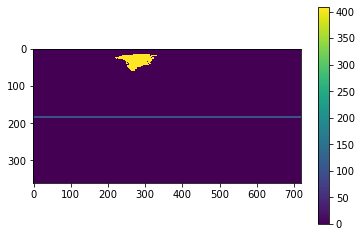

In [33]:
mat_contents_tmp = copy.copy(mat_contents)
mat_contents_tmp["cindx3"][np.where(mat_contents["cindx3"] != 409)] = -1
mat_contents_tmp["cindx3"][180:185, :] = 100

plt.imshow(mat_contents_tmp["cindx3"])
plt.colorbar()

In [18]:
x, y = np.where(mat_contents["cindx3"] == 409)
x = np.float32(x)
y = np.float32(y)

In [19]:
np.int32([x-np.min(x), y - np.min(y)]).T

array([[ 0, 59],
       [ 0, 60],
       [ 0, 61],
       ...,
       [46, 57],
       [46, 58],
       [46, 59]], dtype=int32)

In [20]:
x *= np.float32(0.5*np.pi/180)
y *= np.float32([0.5*np.pi/180])
y -= np.pi
y[np.where(y<0)] += 2*np.pi

In [21]:
from scipy import special

In [22]:
l = np.linspace(0, 61, dtype=int)
m = np.linspace(0, 61, dtype=int)

ylm = special.sph_harm(m, l, y[0], x[0])

In [23]:
ylm

array([ 2.82094792e-01+0.00000000e+00j, -2.83701564e-02+2.69222633e-02j,
        2.59069572e-04-4.94330721e-03j,  3.93087726e-04+4.60247106e-04j,
       -7.22760939e-05-7.59657722e-06j, -1.59041592e-07+1.00414193e-06j,
       -6.74749900e-08-9.81769899e-08j,  1.35969998e-08+2.89015239e-09j,
       -1.37849234e-09+8.44738059e-10j,  1.03577194e-11+1.90766379e-11j,
       -2.38523956e-12-7.75017121e-13j,  2.61137168e-13-1.24555275e-13j,
       -1.19451264e-14+3.11178791e-14j,  4.02817169e-16+1.79347176e-16j,
       -4.77395942e-17+1.69053093e-17j,  2.63869767e-18-5.17869347e-18j,
        1.89311066e-19+6.39111630e-19j,  8.50864177e-21-2.04270948e-21j,
       -5.45605142e-22+8.40150816e-22j, -2.08890604e-23-1.12709939e-22j,
        1.06068928e-23+7.70643006e-24j,  1.07810270e-25-1.33133297e-25j,
        1.53548274e-27+1.95113941e-26j, -1.66112608e-27-1.49570010e-27j,
        2.55125061e-28-6.67932610e-30j,  8.70355121e-32-3.32302965e-30j,
        2.53756183e-31+2.81828121e-31j, -4.31212849

In [33]:
ylm.real

array([ 2.82094792e-01, -2.83701564e-02,  2.59069572e-04,  3.93087726e-04,
       -7.22760939e-05, -1.59041592e-07, -6.74749900e-08,  1.35969998e-08,
       -1.37849234e-09,  1.03577194e-11, -2.38523956e-12,  2.61137168e-13,
       -1.19451264e-14,  4.02817169e-16, -4.77395942e-17,  2.63869767e-18,
        1.89311066e-19,  8.50864177e-21, -5.45605142e-22, -2.08890604e-23,
        1.06068928e-23,  1.07810270e-25,  1.53548274e-27, -1.66112608e-27,
        2.55125061e-28,  8.70355121e-32,  2.53756183e-31, -4.31212849e-32,
        3.83324326e-33, -3.76763795e-35,  7.18279586e-36, -6.98101599e-37,
        2.21385136e-38, -1.17959626e-39,  1.24827005e-40, -5.32476010e-42,
       -7.38606205e-43, -2.19646949e-44,  1.15271212e-45,  9.41473813e-47,
       -3.04647311e-47, -2.34417166e-49, -1.06094731e-50,  4.78324827e-51,
       -6.51947825e-52,  8.92066409e-55, -7.37907573e-55,  1.10176169e-55,
       -8.63358966e-57,  1.11551015e-58])

In [34]:
ylm.imag

array([ 0.00000000e+00,  2.69222633e-02, -4.94330721e-03,  4.60247106e-04,
       -7.59657722e-06,  1.00414193e-06, -9.81769899e-08,  2.89015239e-09,
        8.44738059e-10,  1.90766379e-11, -7.75017121e-13, -1.24555275e-13,
        3.11178791e-14,  1.79347176e-16,  1.69053093e-17, -5.17869347e-18,
        6.39111630e-19, -2.04270948e-21,  8.40150816e-22, -1.12709939e-22,
        7.70643006e-24, -1.33133297e-25,  1.95113941e-26, -1.49570010e-27,
       -6.67932610e-30, -3.32302965e-30,  2.81828121e-31, -3.39398149e-33,
       -3.10405958e-33, -5.18578080e-35,  1.33130297e-36,  4.53345558e-37,
       -9.22106380e-38, -3.49421987e-40, -6.36013240e-41,  1.50362816e-41,
       -1.65897275e-42,  8.43124366e-45, -2.41665757e-45,  2.89764531e-46,
       -1.65413541e-47,  3.82526011e-49, -4.99159890e-50,  3.28750396e-51,
        1.03251768e-52,  8.48828409e-54, -6.30245955e-55, -5.77291238e-57,
        9.09770790e-57,  1.17552878e-58])

In [18]:
max_l = 60
l_range = np.arange(0, max_l+1)
l, m = np.meshgrid(l_range, l_range)

In [23]:
l.reshape([np.size(l), 1])

array([[ 0],
       [ 1],
       [ 2],
       ...,
       [58],
       [59],
       [60]])

In [21]:
np.size(m)

3721

In [25]:
l

array([[ 0,  1,  2, ..., 58, 59, 60],
       [ 0,  1,  2, ..., 58, 59, 60],
       [ 0,  1,  2, ..., 58, 59, 60],
       ...,
       [ 0,  1,  2, ..., 58, 59, 60],
       [ 0,  1,  2, ..., 58, 59, 60],
       [ 0,  1,  2, ..., 58, 59, 60]])

In [15]:
love_n = pd.read_csv("../../grace_fo_stda/physics/params/love_numbers.csv").values

In [35]:
l_range = np.arange(0, 60 + 1)

prem = np.float32([(2*l_range+1)/(1+np.interp(l_range, love_n[:, 0], love_n[:, 1]))]).T.reshape(61, 1, 1)

In [36]:
prem

array([[[  1.       ]],

       [[  2.9211295]],

       [[  7.173601 ]],

       [[  8.684863 ]],

       [[ 10.368664 ]],

       [[ 12.276786 ]],

       [[ 14.270033 ]],

       [[ 16.32209  ]],

       [[ 18.398268 ]],

       [[ 20.474138 ]],

       [[ 22.55639  ]],

       [[ 24.638458 ]],

       [[ 26.709402 ]],

       [[ 28.784649 ]],

       [[ 30.851065 ]],

       [[ 32.908707 ]],

       [[ 34.97986  ]],

       [[ 37.044876 ]],

       [[ 39.103783 ]],

       [[ 41.156605 ]],

       [[ 43.203373 ]],

       [[ 45.258392 ]],

       [[ 47.308662 ]],

       [[ 49.354195 ]],

       [[ 51.395008 ]],

       [[ 53.431114 ]],

       [[ 55.462536 ]],

       [[ 57.489285 ]],

       [[ 59.51138  ]],

       [[ 61.528835 ]],

       [[ 63.541668 ]],

       [[ 65.57719  ]],

       [[ 67.60973  ]],

       [[ 69.63933  ]],

       [[ 71.66598  ]],

       [[ 73.689674 ]],

       [[ 75.710434 ]],

       [[ 77.728264 ]],

       [[ 79.743164 ]],

       [[ 81.75515  ]],



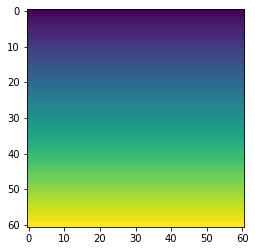

In [37]:
tmp = np.ones([61, 61, 2])
plt.imshow(np.multiply(prem, tmp)[:, :, 0])

In [10]:
from physics.field import GravityField

In [11]:
gravity_processor = GravityField()

In [12]:
gravity_processor.load_location_mask("GREENLAND")

In [13]:
smd = gravity_processor.smd(sc_new)
print(len(smd["smd_anomaly"]))

165


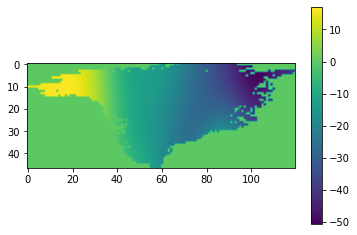

In [14]:
plt.imshow(smd["smd_anomaly"][1])
plt.colorbar()

In [15]:
import plotly.graph_objects as go

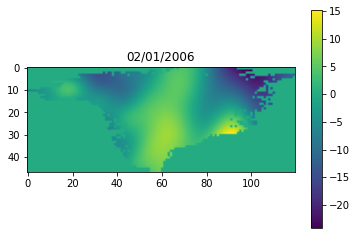

In [17]:
data_smd = []
pix_idx = 40
for i in range(len(smd["smd_anomaly"])):
    # if 1 == smd["header_info"][i]["Start date"].month:
    data_smd.append([smd["header_info"][i]["Start date"].year+smd["header_info"][i]["Start date"].month/12-2002,
                     smd["smd_anomaly"][i][gravity_processor.smd_idx[pix_idx][0], gravity_processor.smd_idx[pix_idx][1]]])
    # np.sqrt(np.mean(np.square()))
    # print(smd["header_info"][i]["Start date"].day)
    if i%400 == 0:
        # tmp_idx = np.where(smd["smd_anomaly"][i] == 0)
        # smd["smd_anomaly"][i][tmp_idx] = np.nan
        plt.imshow(smd["smd_anomaly"][i])
        plt.title(smd["header_info"][i]["Start date"].strftime("%m/%d/%Y"))
        plt.colorbar()
        plt.show()
        # smd["smd_anomaly"][i][tmp_idx] = 0

data_smd = np.float32(data_smd)
data_smd = data_smd[np.argsort(data_smd[:, 0]), :]
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# val1 = []
# for k in np.unique(data_smd[:, 0]):
#     val1.append(np.mean(data_smd[np.where(data_smd[:, 0] == k), 1]))
fig = go.Figure(data=go.Scatter(x=data_smd[:, 0], y=data_smd[:, 1], mode='lines+markers'))
fig.show()

In [17]:
import models.eof as model

In [18]:

model_obj = model.model(gravity_processor)
model_obj.fit(smd)

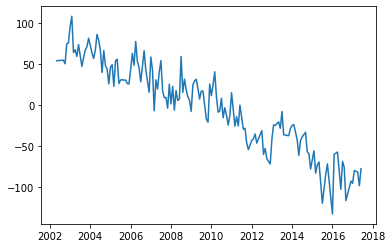

In [19]:
x = np.ones([np.size(data_smd[:, 0]), 3])
x[:, 0] = data_smd[:, 0]+2002
x[:, 1] = gravity_processor.lat[pix_idx]
x[:, 2] = gravity_processor.long[pix_idx]
y = model_obj.reconstruct(x)
plt.plot(x[:, 0], y)
plt.show()

In [20]:
fig = go.Figure(data=go.Scatter(x=data_smd[:, 0], y=data_smd[:, 1], mode='lines+markers'))
fig.add_trace(go.Scatter(x=data_smd[:, 0], y=y, mode='lines'))
fig.show()

In [24]:
np.float32(smd["smd_anomaly"][0][gravity_processor.smd_idx[:, 0], gravity_processor.smd_idx[:, 1]])

array([ 18.25341 ,  19.88186 ,  21.548052, ..., -42.636154, -45.2337  ,
       -47.171757], dtype=float32)